In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# Dataframe from CSV
df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [4]:
df.head ()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
# Numbers of rows and columns
df.shape

(9134, 24)

In [6]:
# Rename columns
df = df.rename(columns=lambda x: x.upper().replace(' ', '_'))

In [7]:
df.columns

Index(['CUSTOMER', 'STATE', 'CUSTOMER_LIFETIME_VALUE', 'RESPONSE', 'COVERAGE',
       'EDUCATION', 'EFFECTIVE_TO_DATE', 'EMPLOYMENTSTATUS', 'GENDER',
       'INCOME', 'LOCATION_CODE', 'MARITAL_STATUS', 'MONTHLY_PREMIUM_AUTO',
       'MONTHS_SINCE_LAST_CLAIM', 'MONTHS_SINCE_POLICY_INCEPTION',
       'NUMBER_OF_OPEN_COMPLAINTS', 'NUMBER_OF_POLICIES', 'POLICY_TYPE',
       'POLICY', 'RENEW_OFFER_TYPE', 'SALES_CHANNEL', 'TOTAL_CLAIM_AMOUNT',
       'VEHICLE_CLASS', 'VEHICLE_SIZE'],
      dtype='object')

# EDA

In [8]:
df_cat = df.select_dtypes (include = object)

In [9]:
df_cat.drop(['CUSTOMER', 'EFFECTIVE_TO_DATE'], axis=1, inplace = True)

### State

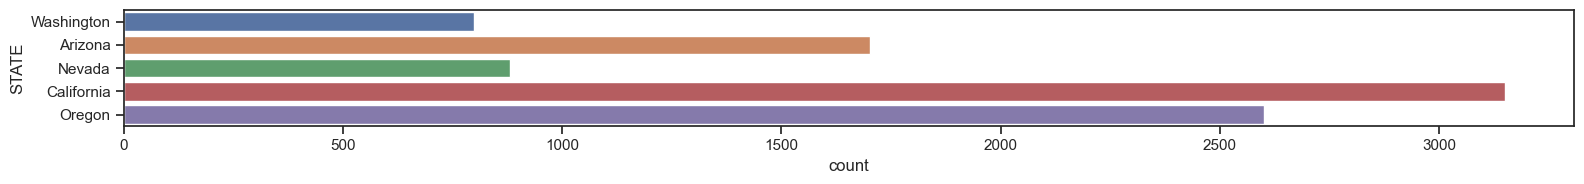

Value counts
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: STATE, dtype: int64
_____________________
Data Distribution


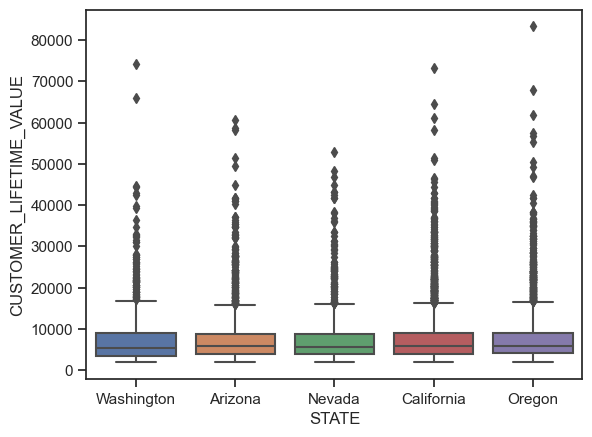

In [10]:
sns.set(style="ticks")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(16, 2))

# Creación de gráfico
sns.countplot(data=df_cat, y=df_cat['STATE'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()
print ('Value counts')
print (df_cat['STATE'].value_counts())
print ('_____________________')

# Visually analyzing categorical data with Target variable
print ('Data Distribution')
sns.boxplot(x="STATE", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### RESPONSE

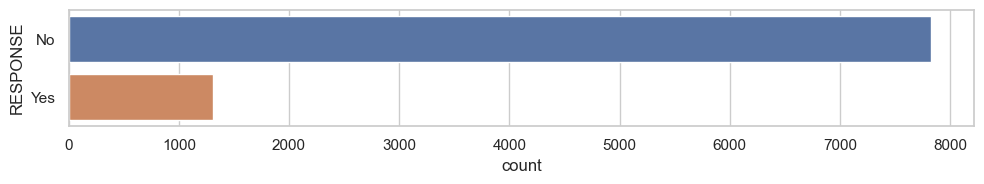

No     7826
Yes    1308
Name: RESPONSE, dtype: int64
Data Distribution


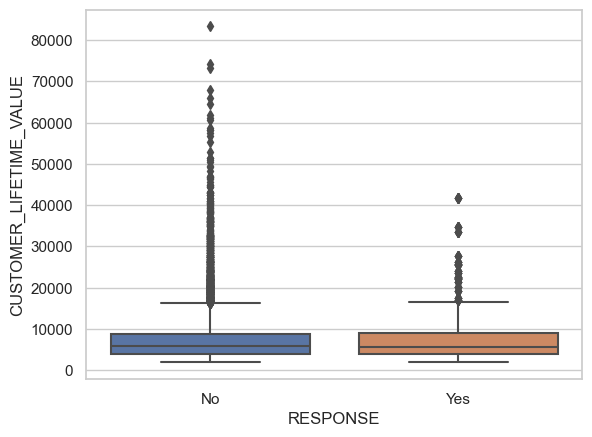

In [11]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 2))

sns.countplot(data=df_cat, y=df_cat['RESPONSE'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['RESPONSE'].value_counts())

# Visually analyzing categorical data with Target variable
print ('Data Distribution')
sns.boxplot(x="RESPONSE", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### COVERAGE

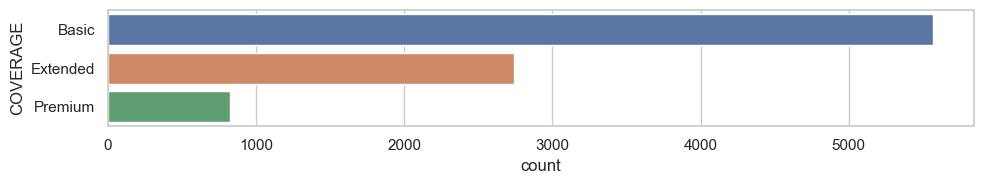

Basic       5568
Extended    2742
Premium      824
Name: COVERAGE, dtype: int64
Data Distribution


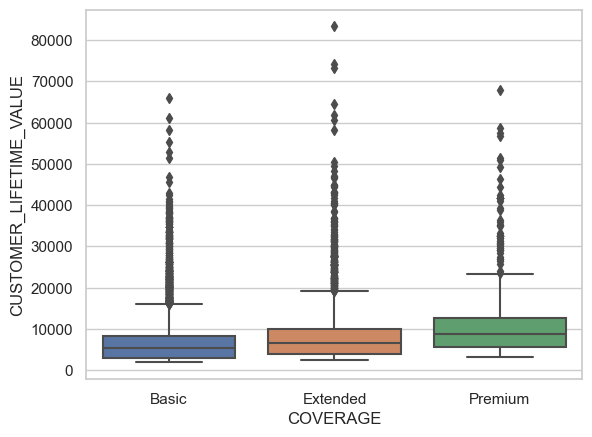

In [12]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 2))

sns.countplot(data=df_cat, y=df_cat['COVERAGE'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['COVERAGE'].value_counts())

print ('Data Distribution')
sns.boxplot(x="COVERAGE", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### EDUCATION

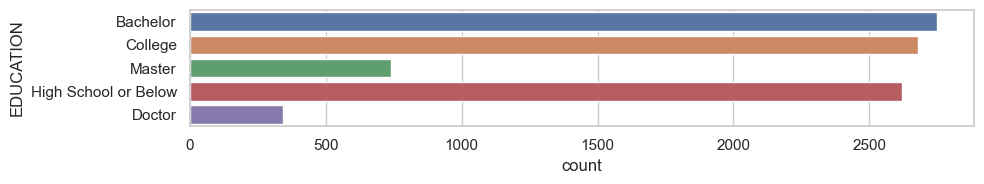

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: EDUCATION, dtype: int64
Data Distribution


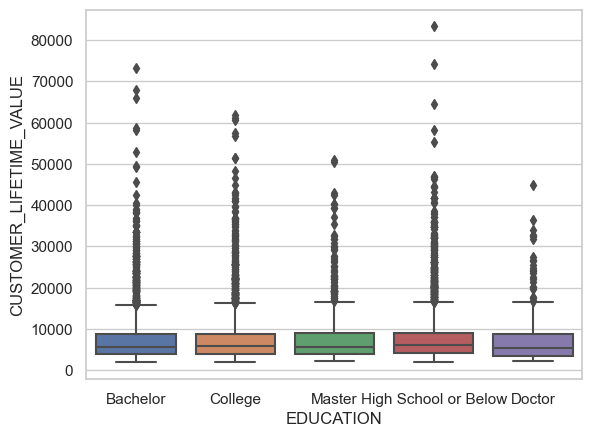

In [13]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 2))

sns.countplot(data=df_cat, y=df_cat['EDUCATION'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['EDUCATION'].value_counts())

print ('Data Distribution')
sns.boxplot(x="EDUCATION", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### EMPLOYMENT STATUS

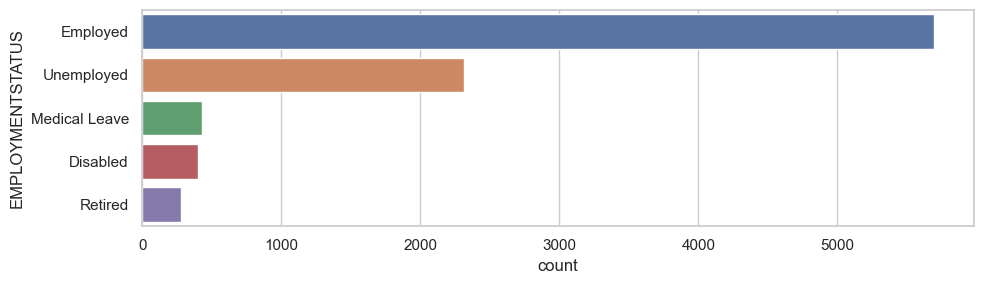

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EMPLOYMENTSTATUS, dtype: int64
Data Distribution


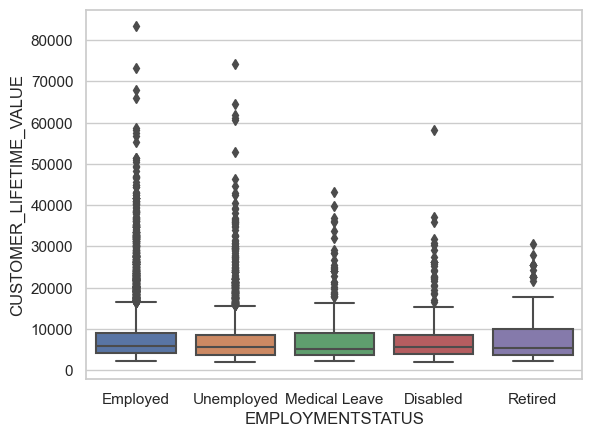

In [14]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 3))

sns.countplot(data=df_cat, y=df_cat['EMPLOYMENTSTATUS'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['EMPLOYMENTSTATUS'].value_counts())

print ('Data Distribution')
sns.boxplot(x="EMPLOYMENTSTATUS", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

In [15]:
def clean_employmentstatus_col(x):
    if x in ['Medical Leave','Disabled','Retired']:
        return 'Other'
    else:
        return x

In [16]:
df['EMPLOYMENTSTATUS'] = list(map(clean_employmentstatus_col, df['EMPLOYMENTSTATUS']))

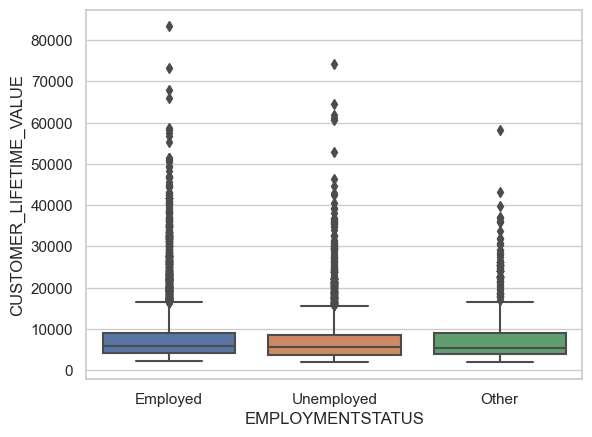

In [17]:
sns.boxplot(x="EMPLOYMENTSTATUS", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### Gender

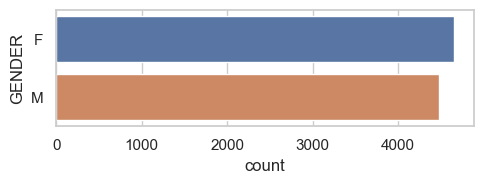

F    4658
M    4476
Name: GENDER, dtype: int64
Data Distribution


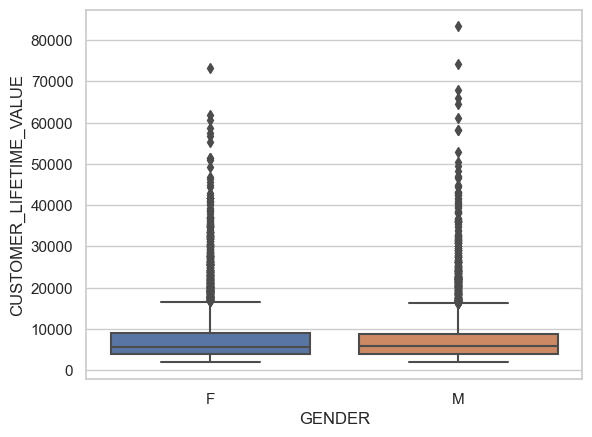

In [18]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(5, 2))

sns.countplot(data=df_cat, y=df_cat['GENDER'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['GENDER'].value_counts())

print ('Data Distribution')
sns.boxplot(x="GENDER", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

LOCATION_CODE

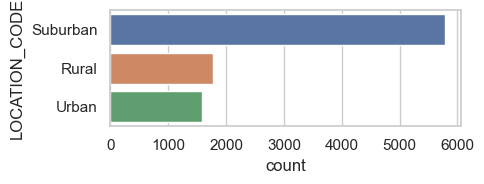

Suburban    5779
Rural       1773
Urban       1582
Name: LOCATION_CODE, dtype: int64
Data Distribution


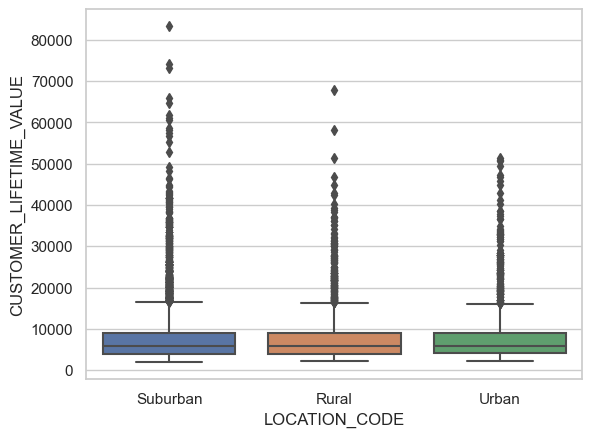

In [19]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(5, 2))

sns.countplot(data=df_cat, y=df_cat['LOCATION_CODE'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['LOCATION_CODE'].value_counts())

print ('Data Distribution')
sns.boxplot(x="LOCATION_CODE", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### MARITAL_STATUS

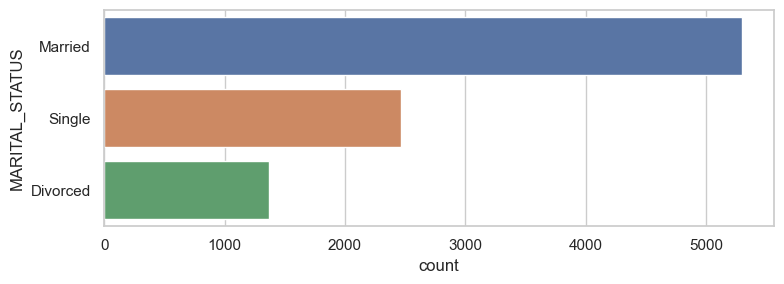

Married     5298
Single      2467
Divorced    1369
Name: MARITAL_STATUS, dtype: int64
Data Distribution


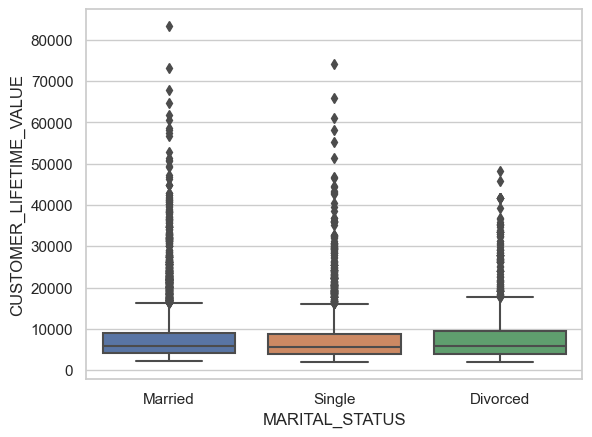

In [20]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 3))

sns.countplot(data=df_cat, y=df_cat['MARITAL_STATUS'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['MARITAL_STATUS'].value_counts())

print ('Data Distribution')
sns.boxplot(x="MARITAL_STATUS", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### POLICY_TYPE

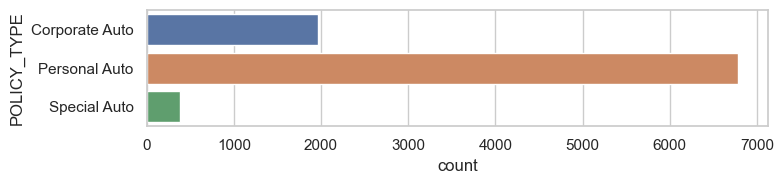

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: POLICY_TYPE, dtype: int64
Data Distribution


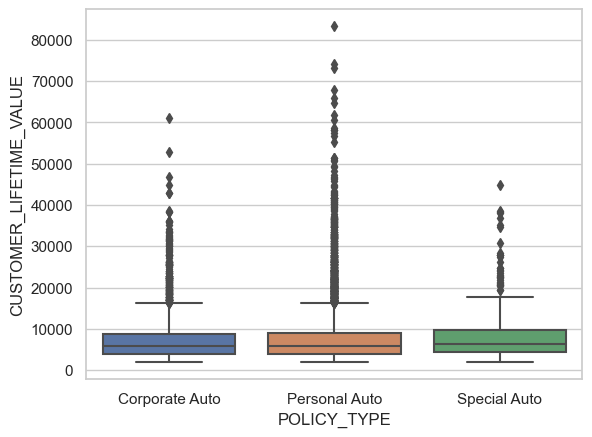

In [21]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 2))

sns.countplot(data=df_cat, y=df_cat['POLICY_TYPE'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['POLICY_TYPE'].value_counts())

print ('Data Distribution')
sns.boxplot(x="POLICY_TYPE", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### POLICY

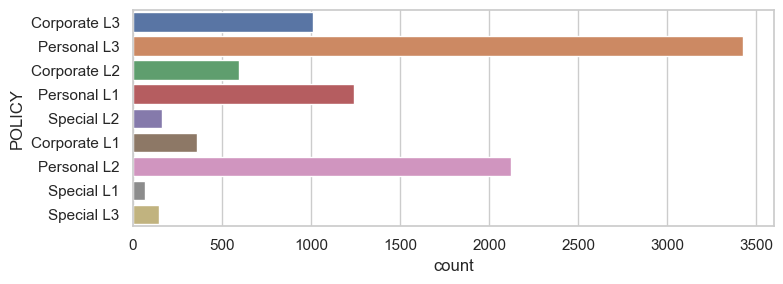

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: POLICY, dtype: int64
Data Distribution


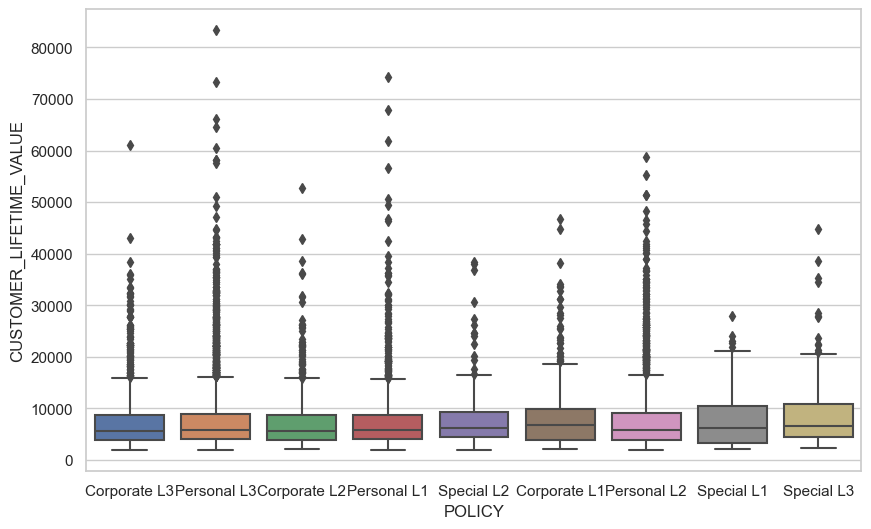

In [22]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 3))

sns.countplot(data=df_cat, y=df_cat['POLICY'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['POLICY'].value_counts())

print ('Data Distribution')
plt.figure(figsize=(10, 6))
sns.boxplot(x="POLICY", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### RENEW_OFFER_TYPE

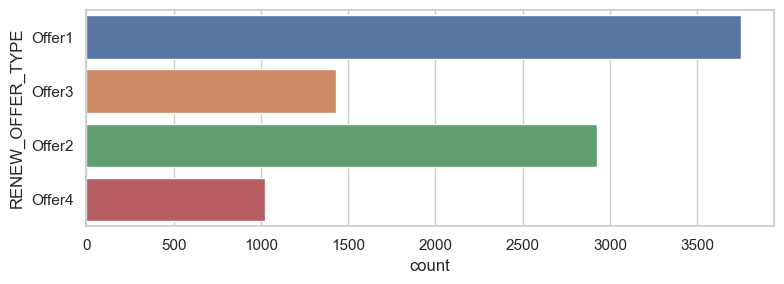

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: RENEW_OFFER_TYPE, dtype: int64
Data Distribution


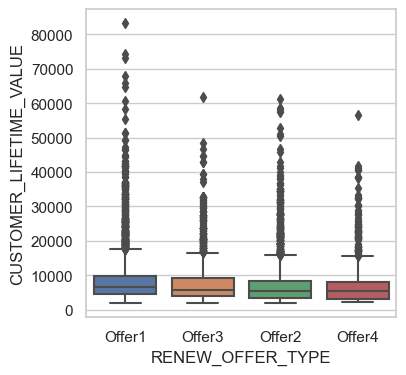

In [23]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 3))

sns.countplot(data=df_cat, y=df_cat['RENEW_OFFER_TYPE'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['RENEW_OFFER_TYPE'].value_counts())

print ('Data Distribution')
plt.figure(figsize=(4, 4))
sns.boxplot(x="RENEW_OFFER_TYPE", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### SALES_CHANNEL

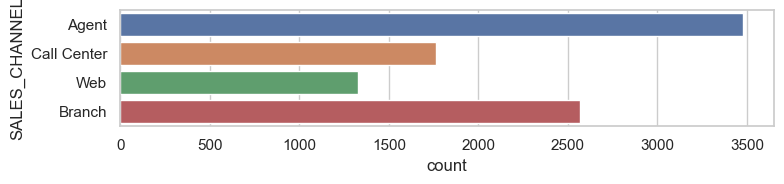

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: SALES_CHANNEL, dtype: int64
Data Distribution


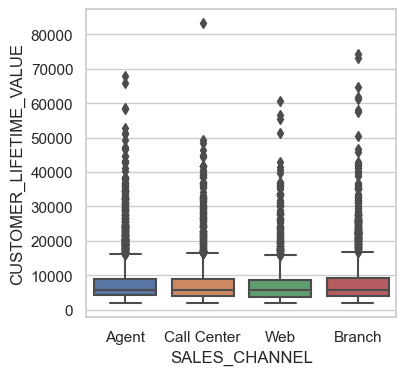

In [24]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 2))

sns.countplot(data=df_cat, y=df_cat['SALES_CHANNEL'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['SALES_CHANNEL'].value_counts())

print ('Data Distribution')
plt.figure(figsize=(4, 4))
sns.boxplot(x="SALES_CHANNEL", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### VEHICLE_CLASS

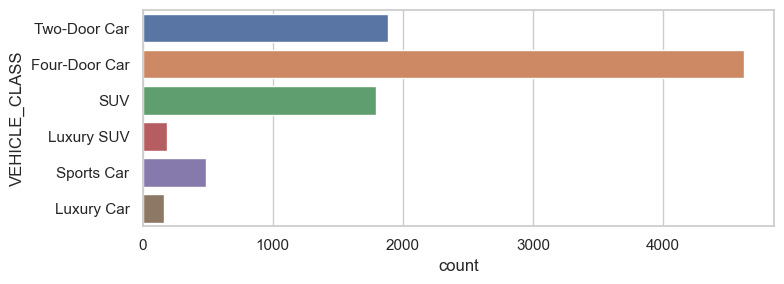

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: VEHICLE_CLASS, dtype: int64
Data Distribution


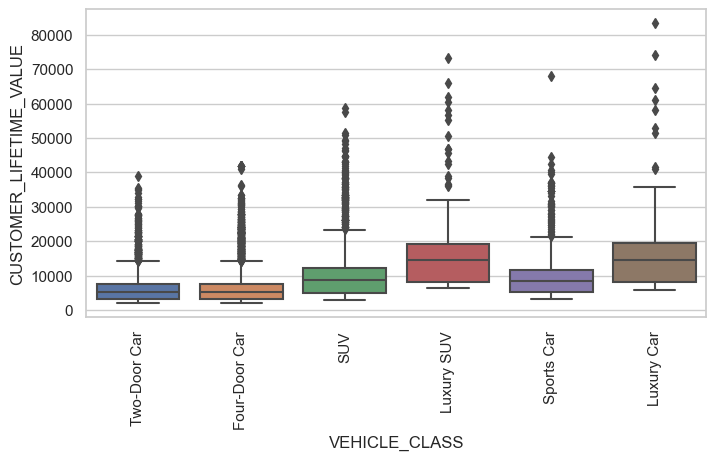

In [25]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 3))

sns.countplot(data=df_cat, y=df_cat['VEHICLE_CLASS'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['VEHICLE_CLASS'].value_counts())

print ('Data Distribution')
plt.figure(figsize=(8, 4))
sns.boxplot(x="VEHICLE_CLASS", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.xticks(rotation=90)
plt.show()

In [26]:
def clean_vehicle_class_col(x):
    if x in ['Sports Car','Luxury SUV','Luxury Car']:
        return 'Other'
    else:
        return x

In [27]:
df['VEHICLE_CLASS'] = list(map(clean_vehicle_class_col, df['VEHICLE_CLASS']))

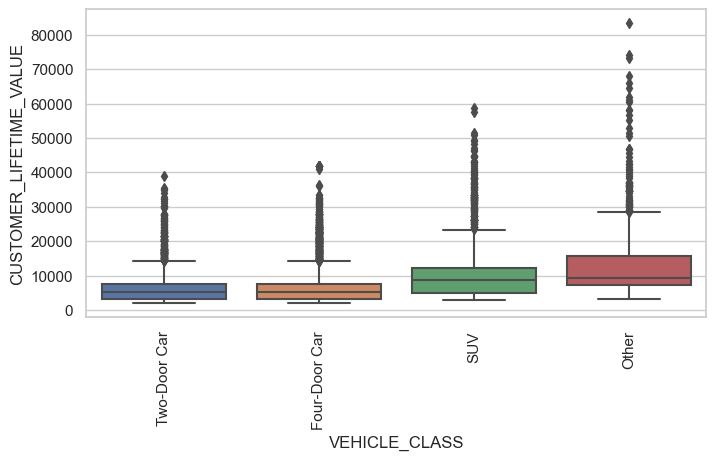

In [28]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="VEHICLE_CLASS", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.xticks(rotation=90)
plt.show()

### VEHICLE_SIZE

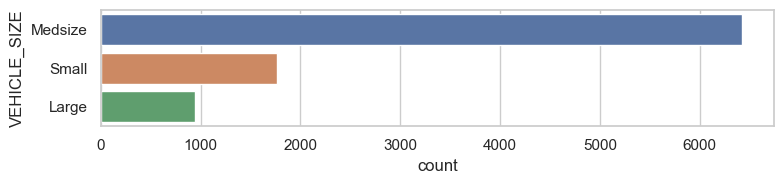

Medsize    6424
Small      1764
Large       946
Name: VEHICLE_SIZE, dtype: int64


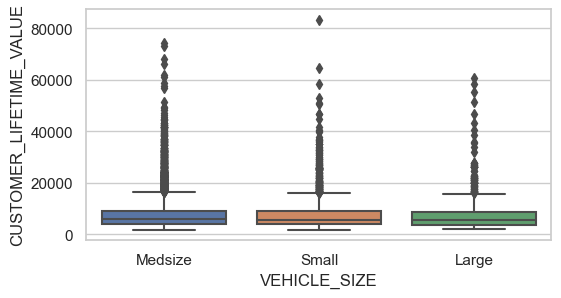

In [29]:
sns.set(style="whitegrid")
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 2))

sns.countplot(data=df_cat, y=df_cat['VEHICLE_SIZE'], ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print (df_cat['VEHICLE_SIZE'].value_counts())

plt.figure(figsize=(6, 3))
sns.boxplot(x="VEHICLE_SIZE", y="CUSTOMER_LIFETIME_VALUE", data=df)
plt.show()

### Week 10
# Lab | Feature extraction

1. Open the categoricals variable we created before.
2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?

2: All categorical variables contain a significatn portion of outliers.

In [30]:
df_cat.head (10)

,STATE,RESPONSE,COVERAGE,EDUCATION,EMPLOYMENTSTATUS,GENDER,LOCATION_CODE,MARITAL_STATUS,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,VEHICLE_CLASS,VEHICLE_SIZE
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
6,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
7,Arizona,No,Premium,Master,Unemployed,M,Urban,Single,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
8,Oregon,Yes,Basic,Bachelor,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
9,Oregon,No,Extended,College,Employed,F,Urban,Married,Special Auto,Special L2,Offer2,Branch,Four-Door Car,Medsize


In [31]:
print (df_cat['POLICY_TYPE'].value_counts())

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: POLICY_TYPE, dtype: int64


In [32]:
print (df_cat['POLICY'].value_counts())

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: POLICY, dtype: int64


The column "POLICY_TYPE" is the result of summing the subgroups of policy types. We could delete the column Policy type because has less information than policy column.

In [33]:
'EFFECTIVE_TO_DATE'

'EFFECTIVE_TO_DATE'

In [34]:
# Convertir la columna 'EFFECTIVE_TO_DATE' a datetime si no lo es ya
df['EFFECTIVE_TO_DATE'] = pd.to_datetime(df['EFFECTIVE_TO_DATE'], format='%m%d%Y', errors='ignore')

# Cambiar el formato de la columna 'EFFECTIVE_TO_DATE' para que los días aparezcan con dos dígitos
# df['EFFECTIVE_TO_DATE'] = df['EFFECTIVE_TO_DATE'].dt.strftime('%d/%m/%Y')

In [35]:
df['EFFECTIVE_TO_DATE'].min ()

'1/1/11'

In [36]:
df['EFFECTIVE_TO_DATE'].max ()

'2/9/11'

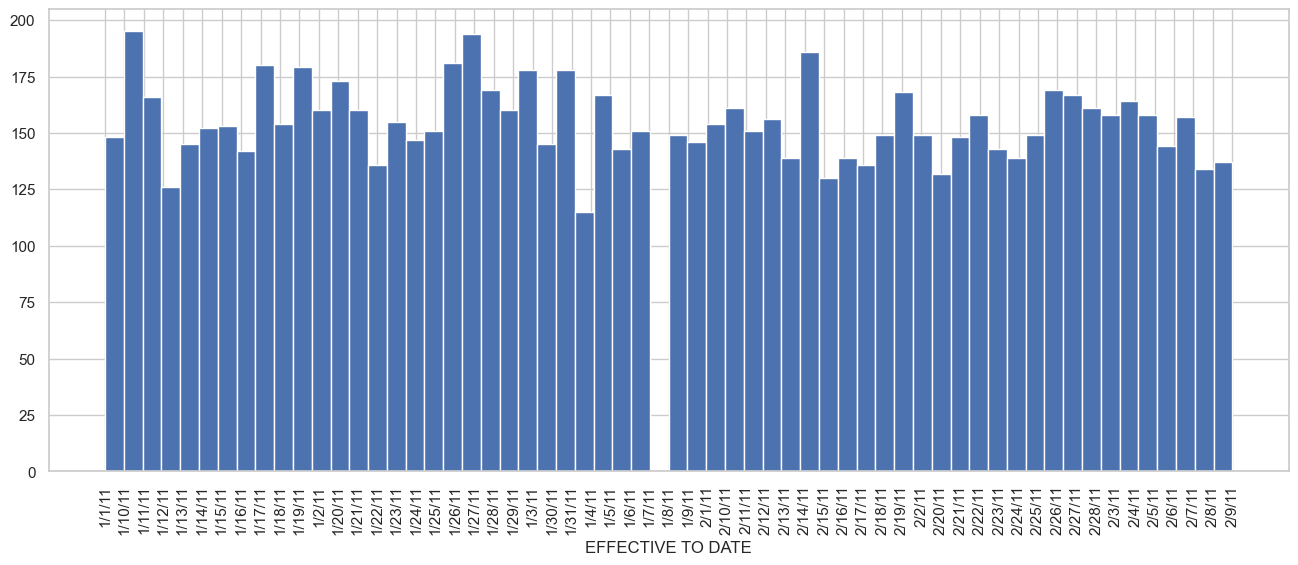

In [37]:
# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea el gráfico de series de tiempo
plt.figure(figsize=(16, 6))  # Ajusta el tamaño del gráfico según tus preferencias

sorted_df = df.sort_values(by=['EFFECTIVE_TO_DATE'])

sorted_df['EFFECTIVE_TO_DATE'].hist(bins=60)

# Añade título y etiquetas a los ejes
plt.xlabel('EFFECTIVE TO DATE')

# Rotación de las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Muestra el gráfico
plt.show()

# Lab 4.04 | Data cleaning and wrangling

1- We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [38]:
df_num = df.select_dtypes (include='number')

In [39]:
# Checking how many unique values each variable has.

for columna in df_num.columns:
    print ('nunique val', columna,': ',df_num[columna].nunique ())

nunique val CUSTOMER_LIFETIME_VALUE :  8041
nunique val INCOME :  5694
nunique val MONTHLY_PREMIUM_AUTO :  202
nunique val MONTHS_SINCE_LAST_CLAIM :  36
nunique val MONTHS_SINCE_POLICY_INCEPTION :  100
nunique val NUMBER_OF_OPEN_COMPLAINTS :  6
nunique val NUMBER_OF_POLICIES :  9
nunique val TOTAL_CLAIM_AMOUNT :  5106


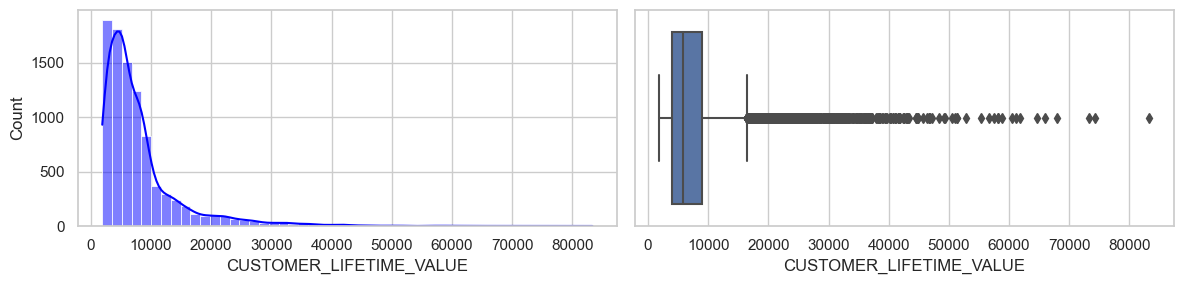

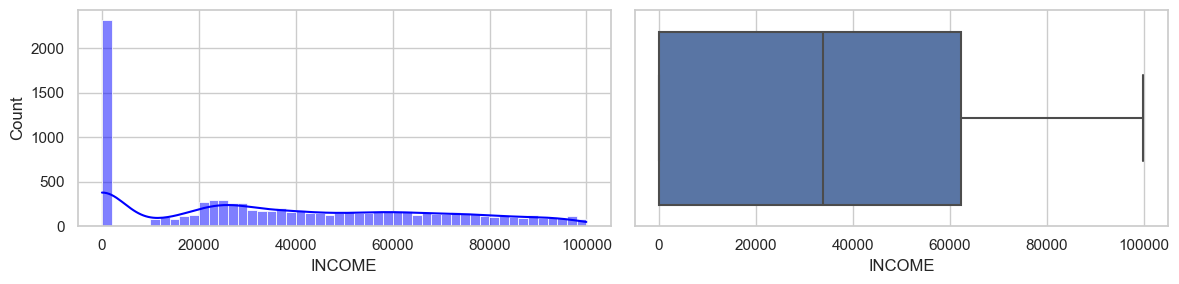

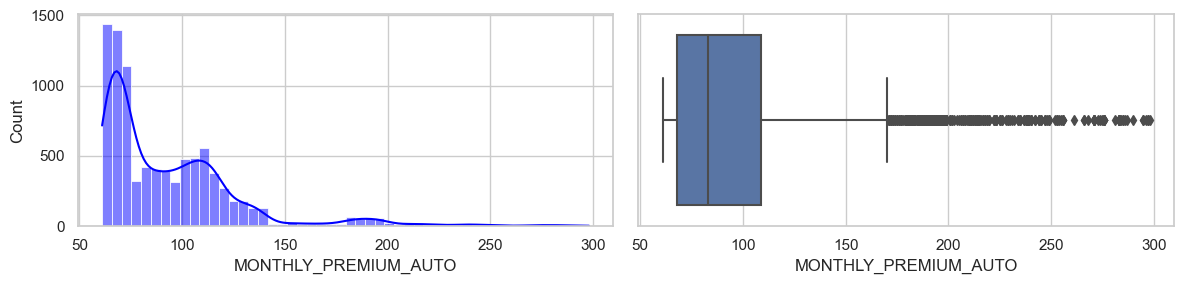

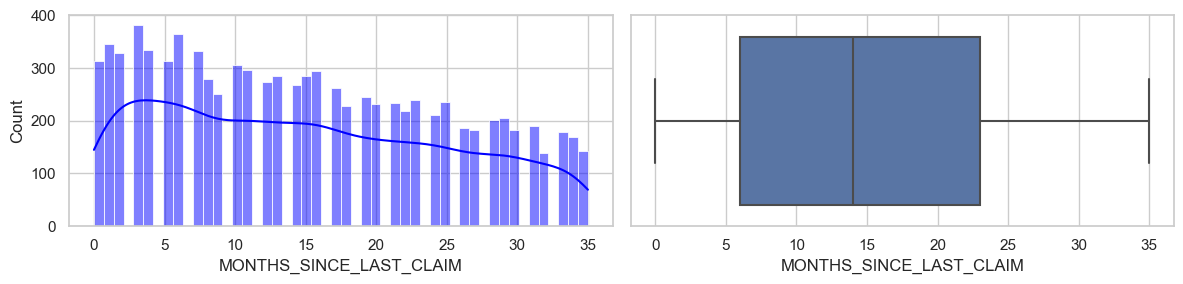

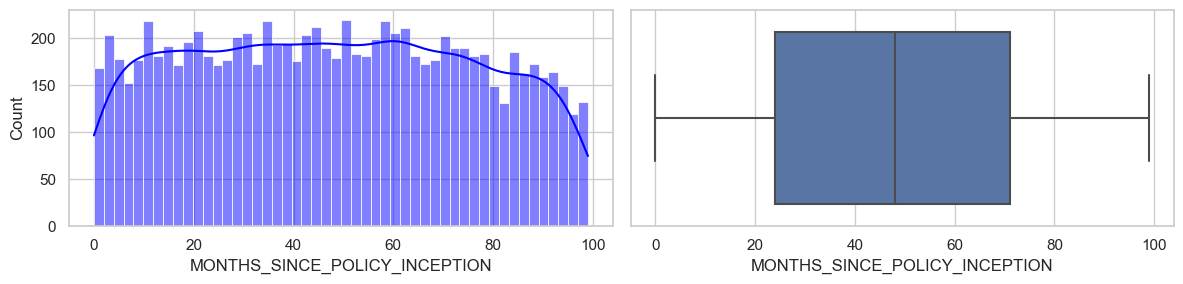

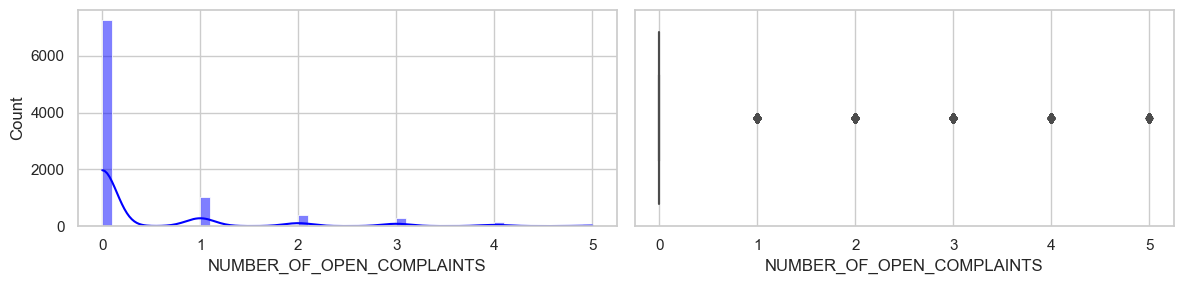

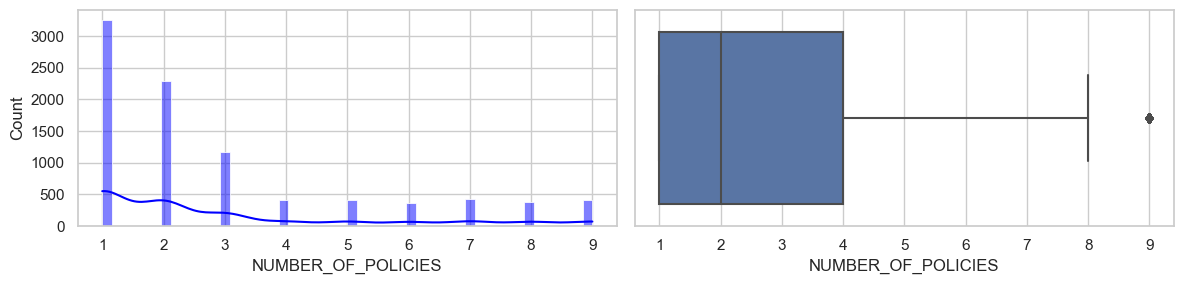

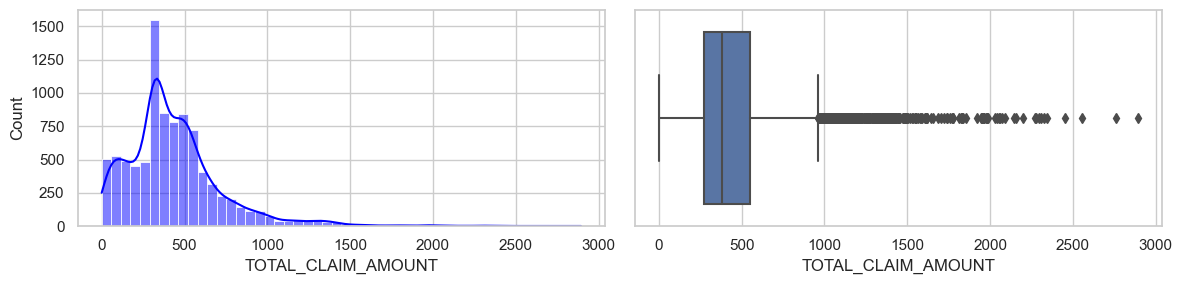

In [40]:
for columna in df_num.columns:
    # Crea dos gráficos de Seaborn
    plt.figure(figsize=(12, 3))  # Tamaño de la figura
    
    # Primer gráfico
    plt.subplot(1, 2, 1)  
    sns.histplot(df_num[columna], bins = 50, kde = True, color = 'blue')

    # Segundo gráfico
    plt.subplot(1, 2, 2)  
    sns.boxplot(x = df_num[columna])

    plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
    plt.show()  # Muestra la figura

In [41]:
df_num.columns

Index(['CUSTOMER_LIFETIME_VALUE', 'INCOME', 'MONTHLY_PREMIUM_AUTO',
       'MONTHS_SINCE_LAST_CLAIM', 'MONTHS_SINCE_POLICY_INCEPTION',
       'NUMBER_OF_OPEN_COMPLAINTS', 'NUMBER_OF_POLICIES',
       'TOTAL_CLAIM_AMOUNT'],
      dtype='object')

In [42]:
df_num.shape

(9134, 8)

### Removing outliers: CUSTOMER_LIFETIME_VALUE

In [43]:
# Checking how many values will be removed if the outliers are removed
iqr = np.percentile(df_num['CUSTOMER_LIFETIME_VALUE'],75) - np.percentile(df_num['CUSTOMER_LIFETIME_VALUE'],25)
upper_limit = np.percentile(df_num['CUSTOMER_LIFETIME_VALUE'],75) + 1.5*iqr
print(upper_limit)

16414.039911750002


In [44]:
new_df = df_num[df_num['CUSTOMER_LIFETIME_VALUE'] > upper_limit]
len(new_df)  # THis checks the number of points that will be removed

817

In [45]:
points = list(filter(lambda x: x < upper_limit, df_num['CUSTOMER_LIFETIME_VALUE']))
len(points)

8317

/var/folders/23/k5r960jx4j5_kg5518sbq1hc0000gp/T/ipykernel_47192/142463807.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num['CUSTOMER_LIFETIME_VALUE'])


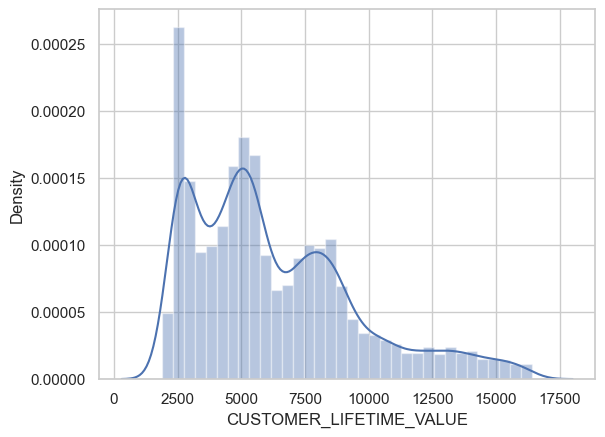

In [46]:
# Removing outliers
df_num = df_num[df_num['CUSTOMER_LIFETIME_VALUE'] < upper_limit]
sns.distplot(df_num['CUSTOMER_LIFETIME_VALUE'])
plt.show()

In [47]:
df_num.shape

(8317, 8)

### Removing outliers: TOTAL_CLAIM_AMOUNT

In [48]:
# Checking how many values will be removed if the outliers are removed
iqr = np.percentile(df_num['TOTAL_CLAIM_AMOUNT'],75) - np.percentile(df_num['TOTAL_CLAIM_AMOUNT'],25)
upper_limit = np.percentile(df_num['TOTAL_CLAIM_AMOUNT'],75) + 1.5*iqr
print(upper_limit)

953.292297


In [49]:
new_df = df_num[df_num['TOTAL_CLAIM_AMOUNT'] > upper_limit]
len(new_df)  # This checks the number of points that will be removed

355

In [50]:
# Removing outliers
df_num = df_num[df_num['TOTAL_CLAIM_AMOUNT'] < upper_limit]

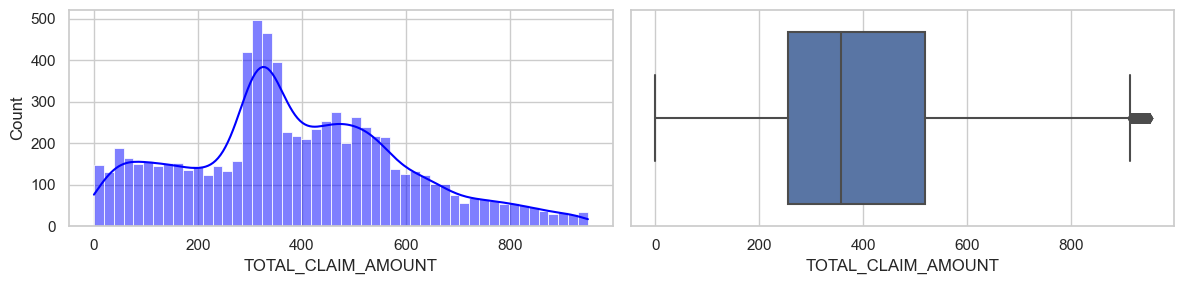

In [51]:
# Crea dos gráficos de Seaborn
plt.figure(figsize=(12, 3))  # Tamaño de la figura
    
# Primer gráfico
plt.subplot(1, 2, 1)  
sns.histplot(df_num['TOTAL_CLAIM_AMOUNT'], bins = 50, kde = True, color = 'blue')

# Segundo gráfico
plt.subplot(1, 2, 2)  
sns.boxplot(x = df_num['TOTAL_CLAIM_AMOUNT'])

plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()  # Muestra la figura

### Removing outliers: MONTHLY_PREMIUM_AUTO

In [52]:
# Checking how many values will be removed if the outliers are removed
iqr = np.percentile(df_num['MONTHLY_PREMIUM_AUTO'],75) - np.percentile(df_num['MONTHLY_PREMIUM_AUTO'],25)
upper_limit = np.percentile(df_num['MONTHLY_PREMIUM_AUTO'],75) + 1.5*iqr
print(upper_limit)

160.5


In [53]:
new_df = df_num[df_num['MONTHLY_PREMIUM_AUTO'] > upper_limit]
len(new_df)  # This checks the number of points that will be removed

145

In [54]:
# Removing outliers
df_num = df_num[df_num['MONTHLY_PREMIUM_AUTO'] < upper_limit]

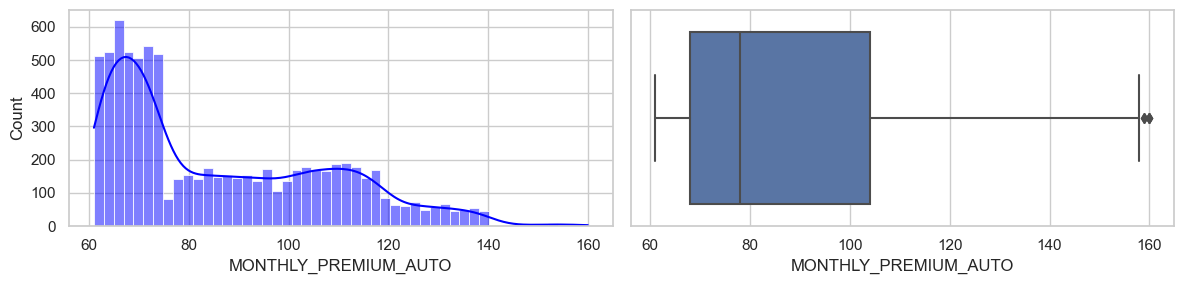

In [55]:
# Crea dos gráficos de Seaborn
plt.figure(figsize=(12, 3))  # Tamaño de la figura
    
# Primer gráfico
plt.subplot(1, 2, 1)  
sns.histplot(df_num['MONTHLY_PREMIUM_AUTO'], bins = 50, kde = True, color = 'blue')

# Segundo gráfico
plt.subplot(1, 2, 2)  
sns.boxplot(x = df_num['MONTHLY_PREMIUM_AUTO'])

plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()  # Muestra la figura

In [56]:
df_num.shape

(7817, 8)

2- Create a copy of the dataframe for the data wrangling.

In [57]:
df_num_backup = df_num.copy ()

3- Normalize the continuous variables. You can use any one method you want.

In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# Variables to normalize: CUSTOMER_LIFETIME_VALUE, INCOME, MONTHLY_PREMIUM_AUTO, TOTAL_CLAIM_AMOUNT

In [59]:
df_continuous_columns = ['CUSTOMER_LIFETIME_VALUE', 'INCOME', 'MONTHLY_PREMIUM_AUTO', 'TOTAL_CLAIM_AMOUNT']
df_selected = df_num [df_continuous_columns]

In [60]:
transformer = Normalizer().fit(df_selected)
x_normalized = transformer.transform(df_selected)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized, columns = df_continuous_columns)
x_normalized

(7817, 4)


,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,TOTAL_CLAIM_AMOUNT
0,0.049048,0.998772,0.001225,0.006830
1,0.255478,0.966747,0.002141,0.011230
2,0.997512,0.000000,0.013829,0.069131
3,0.064055,0.997940,0.001662,0.003145
4,0.130140,0.991492,0.001088,0.002512
...,...,...,...,...
7812,0.085532,0.996269,0.002169,0.011291
7813,0.141858,0.989728,0.003619,0.017372
7814,0.995288,0.000000,0.010363,0.096407
7815,0.324248,0.945494,0.004137,0.029786


In [61]:
#  Concateno los dataframes y elimino las columnas continuas originales de df_num
df_num = pd.concat([x_normalized, df_num.drop(columns = df_continuous_columns)], axis=1)

In [62]:
df_num.head ()

,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,TOTAL_CLAIM_AMOUNT,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES
0,0.049048,0.998772,0.001225,0.006830,32.0,5.0,0.0,1.0
1,0.255478,0.966747,0.002141,0.011230,NaN,NaN,NaN,NaN
2,0.997512,0.000000,0.013829,0.069131,18.0,38.0,0.0,2.0
3,0.064055,0.997940,0.001662,0.003145,18.0,65.0,0.0,7.0
4,0.130140,0.991492,0.001088,0.002512,12.0,44.0,0.0,1.0


5 - The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [69]:
df.columns

Index(['CUSTOMER', 'STATE', 'CUSTOMER_LIFETIME_VALUE', 'RESPONSE', 'COVERAGE',
       'EDUCATION', 'EFFECTIVE_TO_DATE', 'EMPLOYMENTSTATUS', 'GENDER',
       'INCOME', 'LOCATION_CODE', 'MARITAL_STATUS', 'MONTHLY_PREMIUM_AUTO',
       'MONTHS_SINCE_LAST_CLAIM', 'MONTHS_SINCE_POLICY_INCEPTION',
       'NUMBER_OF_OPEN_COMPLAINTS', 'NUMBER_OF_POLICIES', 'POLICY_TYPE',
       'POLICY', 'RENEW_OFFER_TYPE', 'SALES_CHANNEL', 'TOTAL_CLAIM_AMOUNT',
       'VEHICLE_CLASS', 'VEHICLE_SIZE'],
      dtype='object')

In [86]:
df['EFFECTIVE_TO_DATE'].info ()

<class 'pandas.core.series.Series'>
RangeIndex: 9134 entries, 0 to 9133
Series name: EFFECTIVE_TO_DATE
Non-Null Count  Dtype 
--------------  ----- 
9134 non-null   object
dtypes: object(1)
memory usage: 71.5+ KB


In [72]:
# Trabajaremos sobre la columna EFFECTIVE_TO_DATE
df['EFFECTIVE_TO_DATE']

0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9129    2/10/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: EFFECTIVE_TO_DATE, Length: 9134, dtype: object

In [110]:
from datetime import datetime

In [111]:
df['EFFECTIVE_TO_DATE'][0]

Timestamp('2011-02-24 00:00:00')

In [112]:
# Convertir la columna 'fecha' a formato de fecha
df['EFFECTIVE_TO_DATE'] = pd.to_datetime(df['EFFECTIVE_TO_DATE'], format='%m/%d/%y')

In [113]:
df ['EFFECTIVE_TO_DATE']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: EFFECTIVE_TO_DATE, Length: 9134, dtype: datetime64[ns]

In [114]:
df ['EFFECTIVE_TO_DATE'].max ()

Timestamp('2011-02-28 00:00:00')

In [115]:
df ['EFFECTIVE_TO_DATE'].min ()

Timestamp('2011-01-01 00:00:00')

In [117]:
# Como las fechas transcurren dentro de un rango de 60 días, las reemplazaré por valores relativos de ese rango para poder escalar la variable.
df['EFFECTIVE_TO_DATE'] = pd.to_datetime(df['EFFECTIVE_TO_DATE'], format='%m/%d')

In [118]:
df['EFFECTIVE_TO_DATE']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: EFFECTIVE_TO_DATE, Length: 9134, dtype: datetime64[ns]

In [133]:
df_cat.columns

Index(['STATE', 'RESPONSE', 'COVERAGE', 'EDUCATION', 'EMPLOYMENTSTATUS',
       'GENDER', 'LOCATION_CODE', 'MARITAL_STATUS', 'POLICY_TYPE', 'POLICY',
       'RENEW_OFFER_TYPE', 'SALES_CHANNEL', 'VEHICLE_CLASS', 'VEHICLE_SIZE'],
      dtype='object')

In [139]:
# One hot to: state, marital status, policy type, policy, renew offer, customer_df, sales channel, vehicle class
# Ordinal to: coverage, employment status, location code, vehicle size

df_cat_onehot = df_cat[['STATE', 'MARITAL_STATUS', 'POLICY_TYPE','RENEW_OFFER_TYPE', 'SALES_CHANNEL', 'VEHICLE_CLASS']]
df_cat_ordinal = df_cat [['COVERAGE', 'EMPLOYMENTSTATUS', 'LOCATION_CODE', 'VEHICLE_CLASS']]

In [154]:
#para sacar dummies vamos a usar la liberería OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder with drop='first' to drop the first column of each dummy variable
encoder = OneHotEncoder(handle_unknown='error', drop="first")

# Fit the encoder to the categorical data
encoder.fit(df_cat_onehot)

# Transform the categorical data into dummy variables
encoded = encoder.transform(df_cat_onehot).toarray()

# Get the feature names of the encoded variables
feature_names = encoder.get_feature_names_out(df_cat_onehot.columns)

# Convert the encoded array to a DataFrame with column names
df_cat_encoded = pd.DataFrame(encoded, columns=feature_names)


In [155]:
df_cat_encoded

,STATE_California,STATE_Nevada,STATE_Oregon,STATE_Washington,MARITAL_STATUS_Married,MARITAL_STATUS_Single,POLICY_TYPE_Personal Auto,POLICY_TYPE_Special Auto,RENEW_OFFER_TYPE_Offer2,RENEW_OFFER_TYPE_Offer3,RENEW_OFFER_TYPE_Offer4,SALES_CHANNEL_Branch,SALES_CHANNEL_Call Center,SALES_CHANNEL_Web,VEHICLE_CLASS_Luxury Car,VEHICLE_CLASS_Luxury SUV,VEHICLE_CLASS_SUV,VEHICLE_CLASS_Sports Car,VEHICLE_CLASS_Two-Door Car
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9131,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9132,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
# Codificación ordinal

df_cat_ordinal.columns

Index(['COVERAGE', 'EMPLOYMENTSTATUS', 'LOCATION_CODE', 'VEHICLE_CLASS'], dtype='object')

In [157]:
df_cat_ordinal['COVERAGE'].unique ()

array([0, 1, 2])

In [158]:
df_cat_ordinal["COVERAGE"] = df_cat_ordinal["COVERAGE"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

/var/folders/23/k5r960jx4j5_kg5518sbq1hc0000gp/T/ipykernel_47192/1891525026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_ordinal["COVERAGE"] = df_cat_ordinal["COVERAGE"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})


In [159]:
df_cat_ordinal['EMPLOYMENTSTATUS'].unique ()

array([nan])

In [160]:
df_cat_ordinal["EMPLOYMENTSTATUS"] = df_cat_ordinal["EMPLOYMENTSTATUS"].map({"Employed" : 0, 
                                                                             "Unemployed" : 1, 
                                                                             "Medical Leave" : 2,
                                                                             "Disabled" : 3,
                                                                             "Retired" : 4
                                                                             })

/var/folders/23/k5r960jx4j5_kg5518sbq1hc0000gp/T/ipykernel_47192/1825755603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_ordinal["EMPLOYMENTSTATUS"] = df_cat_ordinal["EMPLOYMENTSTATUS"].map({"Employed" : 0,


In [161]:
df_cat_ordinal.columns

Index(['COVERAGE', 'EMPLOYMENTSTATUS', 'LOCATION_CODE', 'VEHICLE_CLASS'], dtype='object')

In [162]:
df_cat_ordinal['LOCATION_CODE'].unique ()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [163]:
df_cat_ordinal["EMPLOYMENTSTATUS"] = df_cat_ordinal["EMPLOYMENTSTATUS"].map({"Suburban" : 0, 
                                                                             "Rural" : 1, 
                                                                             "Urban Leave" : 2
                                                                             })

/var/folders/23/k5r960jx4j5_kg5518sbq1hc0000gp/T/ipykernel_47192/1345536602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_ordinal["EMPLOYMENTSTATUS"] = df_cat_ordinal["EMPLOYMENTSTATUS"].map({"Suburban" : 0,


In [164]:
df_cat_ordinal['VEHICLE_CLASS'].unique ()

array([ 0.,  1.,  2.,  3.,  4., nan])

In [165]:
df_cat_ordinal["VEHICLE_CLASS"] = df_cat_ordinal["VEHICLE_CLASS"].map({"Two-Door Car" : 0, 
                                                                        "Four-Door Car" : 1, 
                                                                        "SUV" : 2,
                                                                        "Luxury SUV" : 3,
                                                                        "Sports Car" : 4
                                                                        })

/var/folders/23/k5r960jx4j5_kg5518sbq1hc0000gp/T/ipykernel_47192/2035119924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_ordinal["VEHICLE_CLASS"] = df_cat_ordinal["VEHICLE_CLASS"].map({"Two-Door Car" : 0,


In [167]:
df_cat_encoded

,STATE_California,STATE_Nevada,STATE_Oregon,STATE_Washington,MARITAL_STATUS_Married,MARITAL_STATUS_Single,POLICY_TYPE_Personal Auto,POLICY_TYPE_Special Auto,RENEW_OFFER_TYPE_Offer2,RENEW_OFFER_TYPE_Offer3,RENEW_OFFER_TYPE_Offer4,SALES_CHANNEL_Branch,SALES_CHANNEL_Call Center,SALES_CHANNEL_Web,VEHICLE_CLASS_Luxury Car,VEHICLE_CLASS_Luxury SUV,VEHICLE_CLASS_SUV,VEHICLE_CLASS_Sports Car,VEHICLE_CLASS_Two-Door Car
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9131,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9132,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
